# Trump Press Briefing Analysis

This notebook analyzes the frequency of specific phrases in press briefings to understand key topics and messaging patterns.

## Setup

In [1]:
import os
import re
from datetime import datetime
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('default')
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

# Set pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
INAUGURATION_DATE = datetime(2025, 1, 20)
CONTEXT_WINDOW = 200  # words to display for context

## Define Search Phrases

We'll analyze the following key phrases in press briefings:
Deport
America First
Ukraine
Israel
DOGE / Department of Government Efficiency / Doge
Russia
Elon / Musk
Inflation
Fraud
Intelligence
Crypto
Lawsuit
Egg
GM
Interest Rate
CBS
Ford
Chrysler
Debt Ceiling
Sylvester / Turner

In [3]:
SEARCH_PHRASES = {
    'Iran': r'\b(iran|irans|iran\'s|iran-\w+|\w+-iran)\b',
    'Israel': r'\b(israel|israels|israel\'s|israel-\w+|\w+-israel)\b',
    'Nuclear': r'\b(nuclear|nuclears|nuclear\'s|nuclear-\w+|\w+-nuclear)\b',
    'Congress': r'\b(congress|congresses|congress\'s|congresses\'|congress-\w+|\w+-congress)\b',
    'Intelligence': r'\b(intelligence|intelligences|intelligence\'s|intelligences\'|intelligence-\w+|\w+-intelligence)\b',
    'Diplomacy': r'\b(diplomacy|diplomacies|diplomacy\'s|diplomacies\'|diplomacy-\w+|\w+-diplomacy)\b',
    'Authorization': r'\b(authorization|authorizations|authorization\'s|authorizations\'|authorization-\w+|\w+-authorization)\b',
    'Sanction': r'\b(sanction|sanctions|sanction\'s|sanctions\'|sanction-\w+|\w+-sanction)\b',
    'Situation Room': r'\b(situation\s+room|situation\s+rooms|situation\s+room\'s|situation\s+rooms\'|situation-room|\w+-situation-room)\b',
    'Steve Witkoff': r'\b(steve\s+witkoff|steve\s+witkoffs|steve\s+witkoff\'s|steve\s+witkoffs\'|steve-witkoff|\w+-steve-witkoff)\b',
    'Two week': r'\b(two\s+week|two\s+weeks|two\s+week\'s|two\s+weeks\'|two-week|\w+-two-week)\b',
    'Geneva': r'\b(geneva|genevas|geneva\'s|genevas\'|geneva-\w+|\w+-geneva)\b',
    'Ayatollah': r'\b(ayatollah|ayatollahs|ayatollah\'s|ayatollahs\'|ayatollah-\w+|\w+-ayatollah)\b',
    'Evacuation': r'\b(evacuation|evacuations|evacuation\'s|evacuations\'|evacuation-\w+|\w+-evacuation)\b',
    'Public opinion': r'\b(public\s+opinion|public\s+opinions|public\s+opinion\'s|public\s+opinions\'|public-opinion|\w+-public-opinion)\b'
}

In [4]:
def count_phrases(text, phrases=SEARCH_PHRASES):
    """Count occurrences of phrases in text"""
    counts = {}
    for name, pattern in phrases.items():
        counts[name] = len(re.findall(pattern, text.lower()))
    return counts

def get_date_from_filename(filename):
    """Extract date from filename format YYYY-MM-DD_..."""
    date_str = filename.split('_')[0]
    return datetime.strptime(date_str, '%Y-%m-%d')

def read_transcript(filepath):
    """Read and return transcript text"""
    with open(filepath, 'r', encoding='utf-8') as f:
        return f.read()

def find_phrase_context(text, pattern, window=CONTEXT_WINDOW):
    """Find phrase in text with surrounding context"""
    matches = []
    for match in re.finditer(pattern, text.lower()):
        start = max(0, match.start() - window)
        end = min(len(text), match.end() + window)
        context = text[start:end]
        # Add ellipsis if we're not at the start/end of the text
        if start > 0:
            context = '...' + context
        if end < len(text):
            context = context + '...'
        matches.append(context)
    return matches

def process_directory(directory):
    """Process transcripts from press briefing directory only"""
    results = []
    
    for root, _, files in os.walk(directory):
        category = os.path.basename(root)
        if category != 'press briefing':  # Only process press briefings
            continue
            
        for file in files:
            if file.endswith('.txt'):
                filepath = os.path.join(root, file)
                try:
                    date = get_date_from_filename(file)
                    text = read_transcript(filepath)
                    counts = count_phrases(text)
                    
                    results.append({
                        'date': date,
                        'file': file,
                        'text_length': len(text.split()),
                        'text': text,  # Store full text for context analysis
                        **counts
                    })
                except Exception as e:
                    print(f"Error processing {filepath}: {str(e)}")
    
    return pd.DataFrame(results)

In [5]:
# Process press briefing transcripts
df = process_directory('../data/processed-transcripts')
df = df.sort_values('date')

# Split data by date 
df_pre = df[df['date'] < INAUGURATION_DATE]
df_post = df[df['date'] >= INAUGURATION_DATE]

# Print dataset statistics
print("Dataset Statistics:")
print(f"Pre-inauguration briefings: {len(df_pre)}")
print(f"Post-inauguration briefings: {len(df_post)}")

print("\nWord Count Statistics:")
print(f"Pre-inauguration average length: {df_pre['text_length'].mean():.0f} words")
print(f"Post-inauguration average length: {df_post['text_length'].mean():.0f} words")

print("\nDate Ranges:")
# Handle NaT values when printing date ranges
pre_min = df_pre['date'].min()
pre_max = df_pre['date'].max()
print("Pre-inauguration: ", end='')
if pd.notna(pre_min) and pd.notna(pre_max):
    print(f"{pre_min.strftime('%Y-%m-%d')} to {pre_max.strftime('%Y-%m-%d')}")
else:
    print("No valid dates")

if not df_post.empty:
    post_min = df_post['date'].min()
    post_max = df_post['date'].max() 
    print("Post-inauguration: ", end='')
    if pd.notna(post_min) and pd.notna(post_max):
        print(f"{post_min.strftime('%Y-%m-%d')} to {post_max.strftime('%Y-%m-%d')}")
    else:
        print("No valid dates")

Dataset Statistics:
Pre-inauguration briefings: 0
Post-inauguration briefings: 64

Word Count Statistics:
Pre-inauguration average length: nan words
Post-inauguration average length: 1953 words

Date Ranges:
Pre-inauguration: No valid dates
Post-inauguration: 2025-01-28 to 2025-06-23


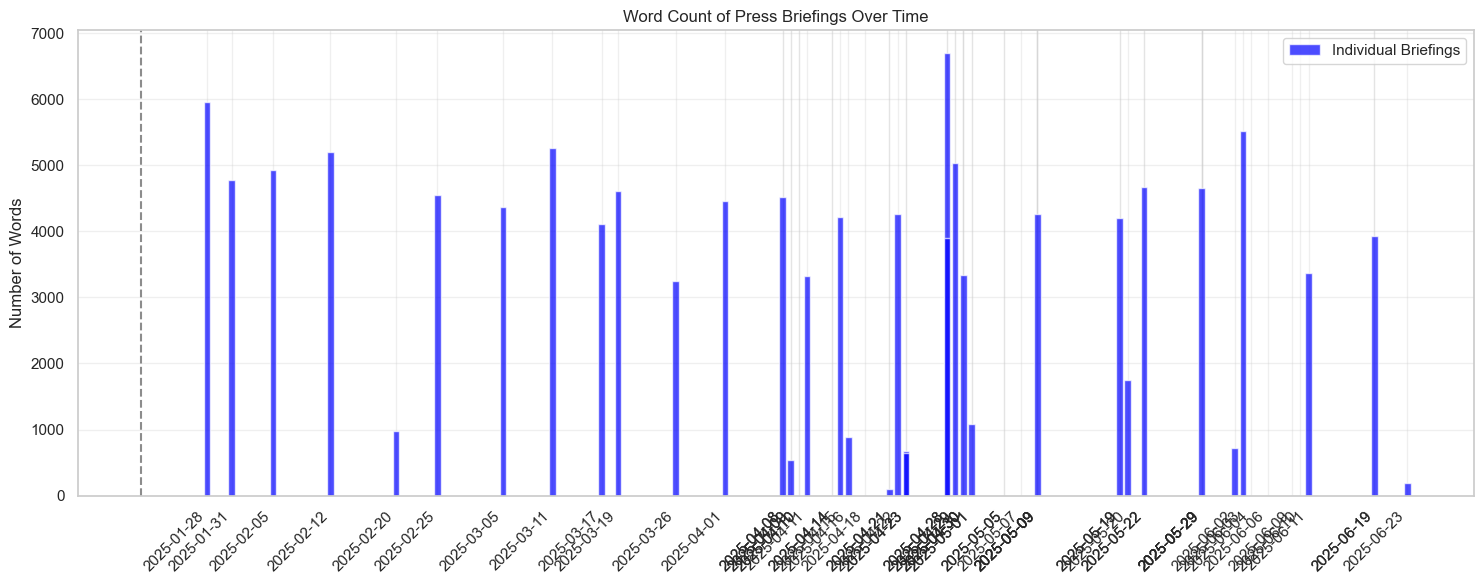


Word Count Summary:
Mean word count: 1953
Median word count: 660
Min word count: 0
Max word count: 6706


In [6]:
# Plot total word counts over time as a bar chart
plt.figure(figsize=(15, 6))

# Create bar plot
bars = plt.bar(df['date'], df['text_length'], alpha=0.7, color='blue', label='Individual Briefings')

# Format x-axis with rotated date labels
plt.xticks(df['date'], [d.strftime('%Y-%m-%d') for d in df['date']], rotation=45, ha='right')

plt.title('Word Count of Press Briefings Over Time')
plt.xlabel('') # Remove x-axis label since dates are shown
plt.ylabel('Number of Words')
plt.legend()
plt.grid(True, alpha=0.3)

# Add vertical line for inauguration
plt.axvline(x=INAUGURATION_DATE, color='k', linestyle='--', alpha=0.5, label='Inauguration')

# Set y-axis to start at 0
plt.ylim(bottom=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nWord Count Summary:")
print(f"Mean word count: {df['text_length'].mean():.0f}")
print(f"Median word count: {df['text_length'].median():.0f}")
print(f"Min word count: {df['text_length'].min():.0f}")
print(f"Max word count: {df['text_length'].max():.0f}")


In [7]:
# Filter out briefings with less than 2000 words
print(f"Original dataset size: {len(df)} briefings")
print(f"Briefings with <2000 words: {len(df[df['text_length'] < 2000])}")

# Filter the dataset
df = df[df['text_length'] >= 2000].copy()

print(f"Filtered dataset size: {len(df)} briefings")
print(f"Removed {len(df[df['text_length'] < 2000])} briefings with <2000 words")

# Reset index after filtering
df = df.reset_index(drop=True)


Original dataset size: 64 briefings
Briefings with <2000 words: 38
Filtered dataset size: 26 briefings
Removed 0 briefings with <2000 words


## Phrase Frequency Analysis

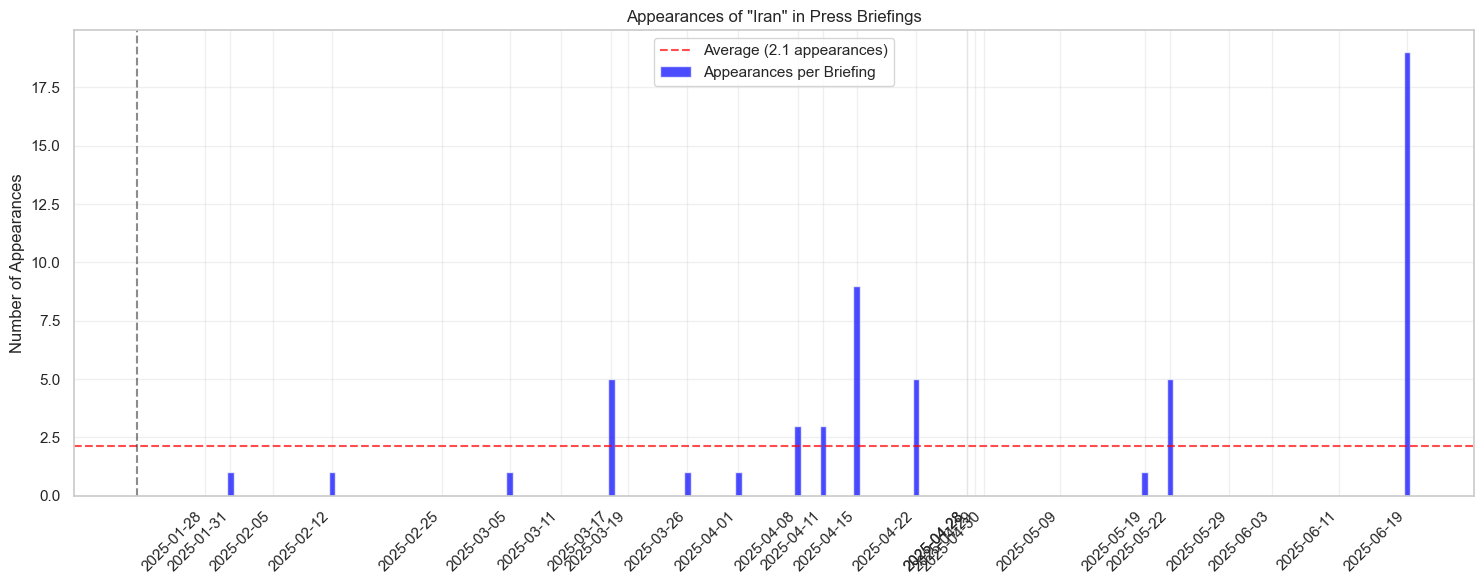

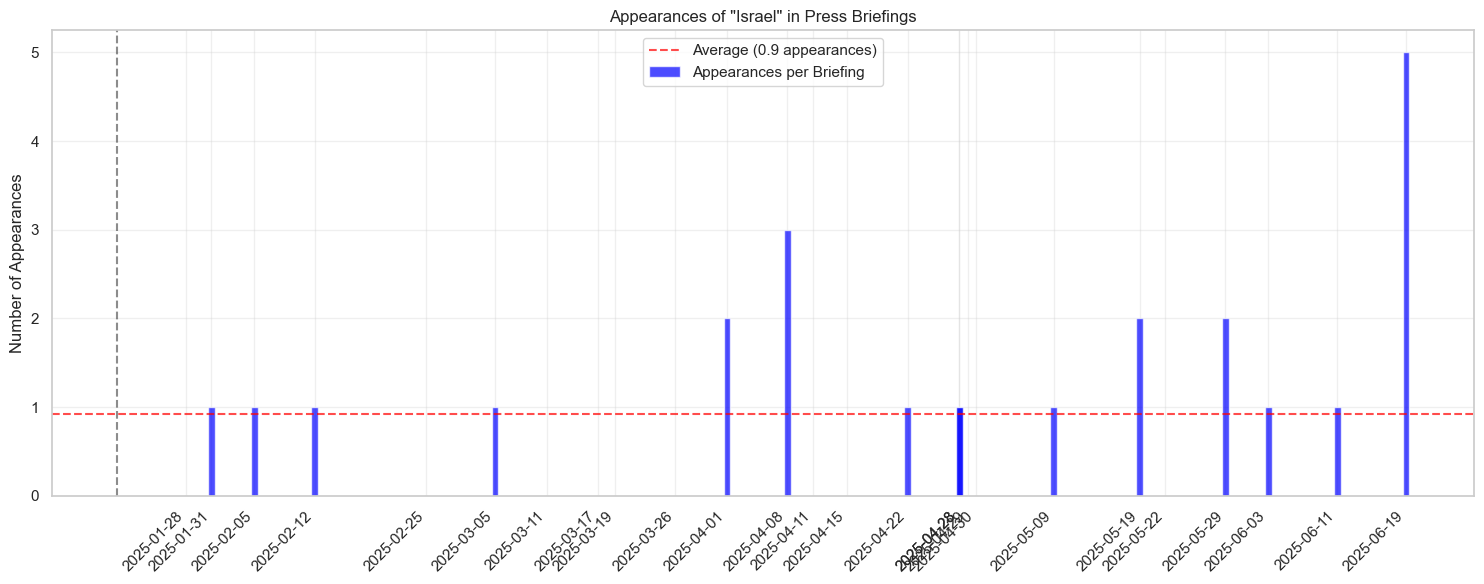

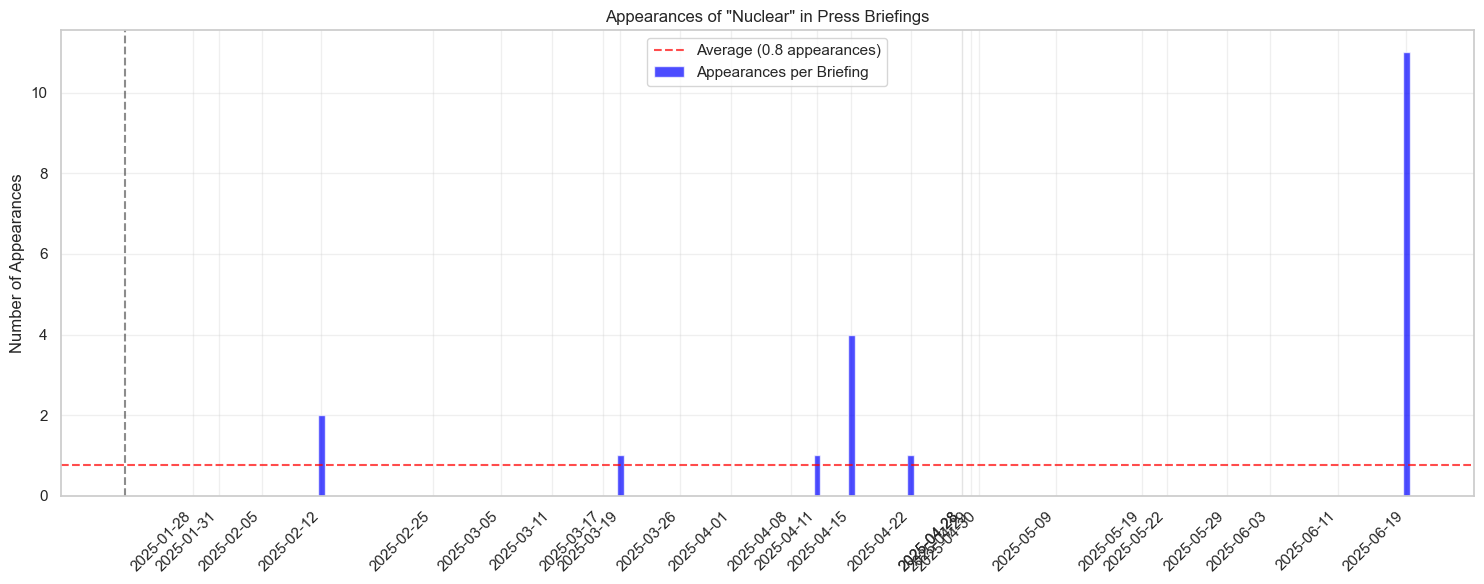

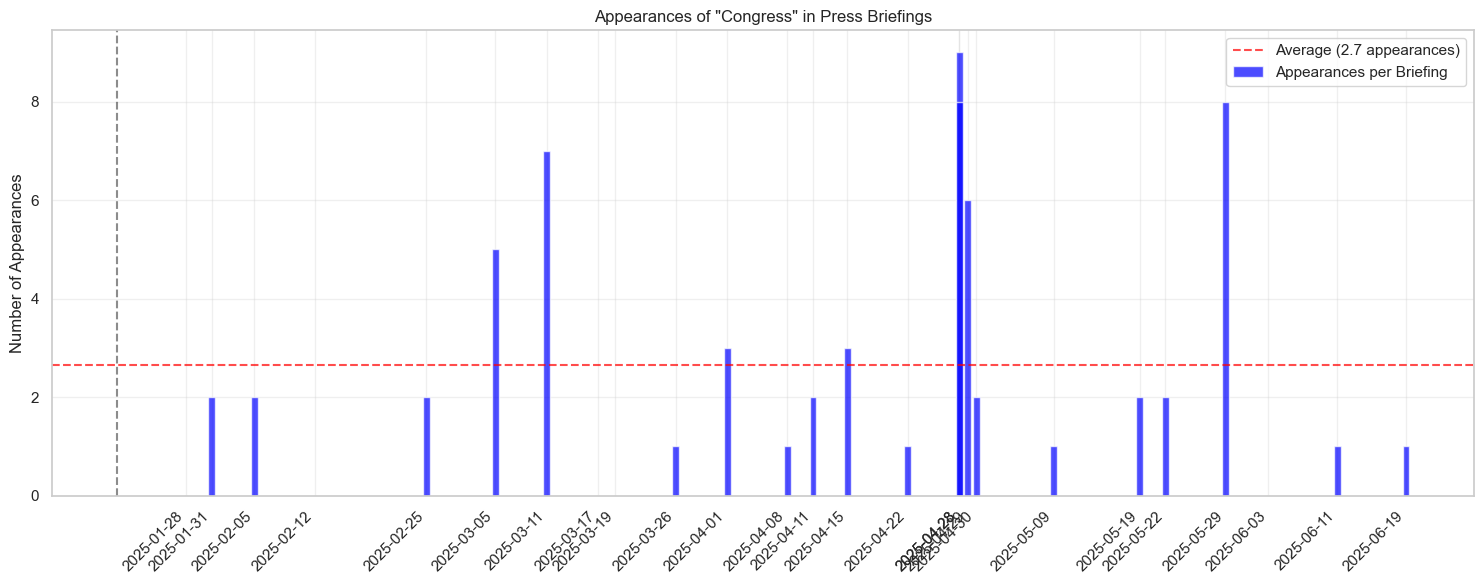

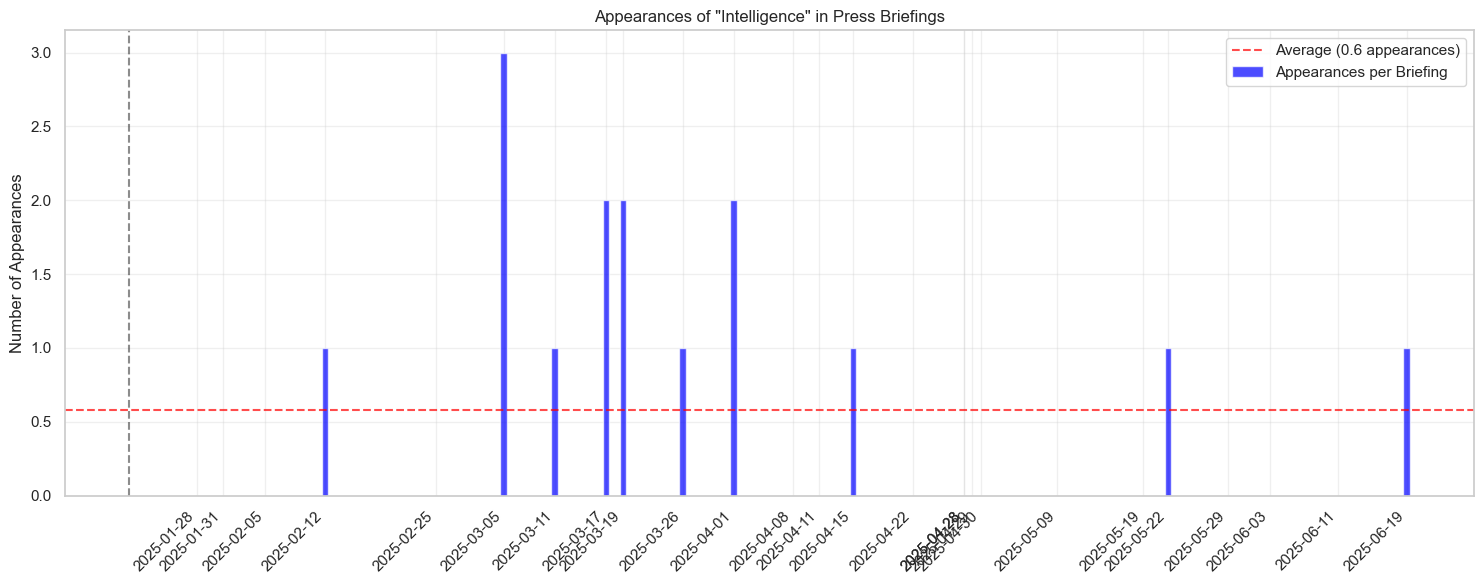

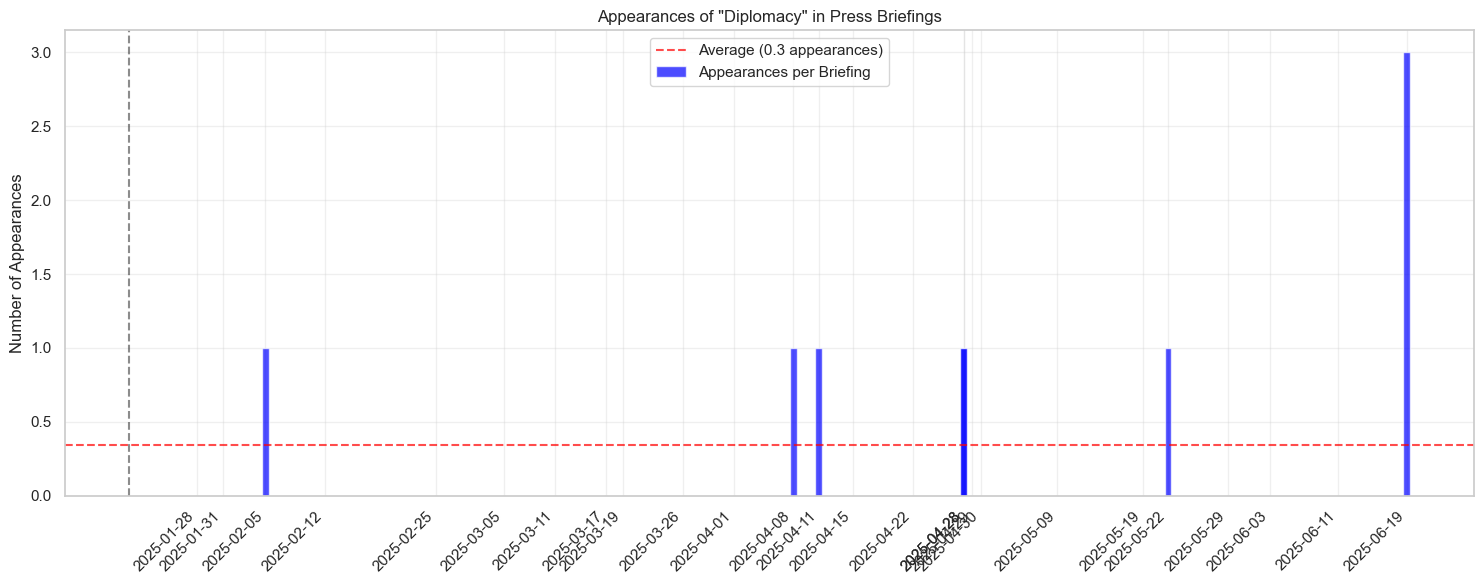

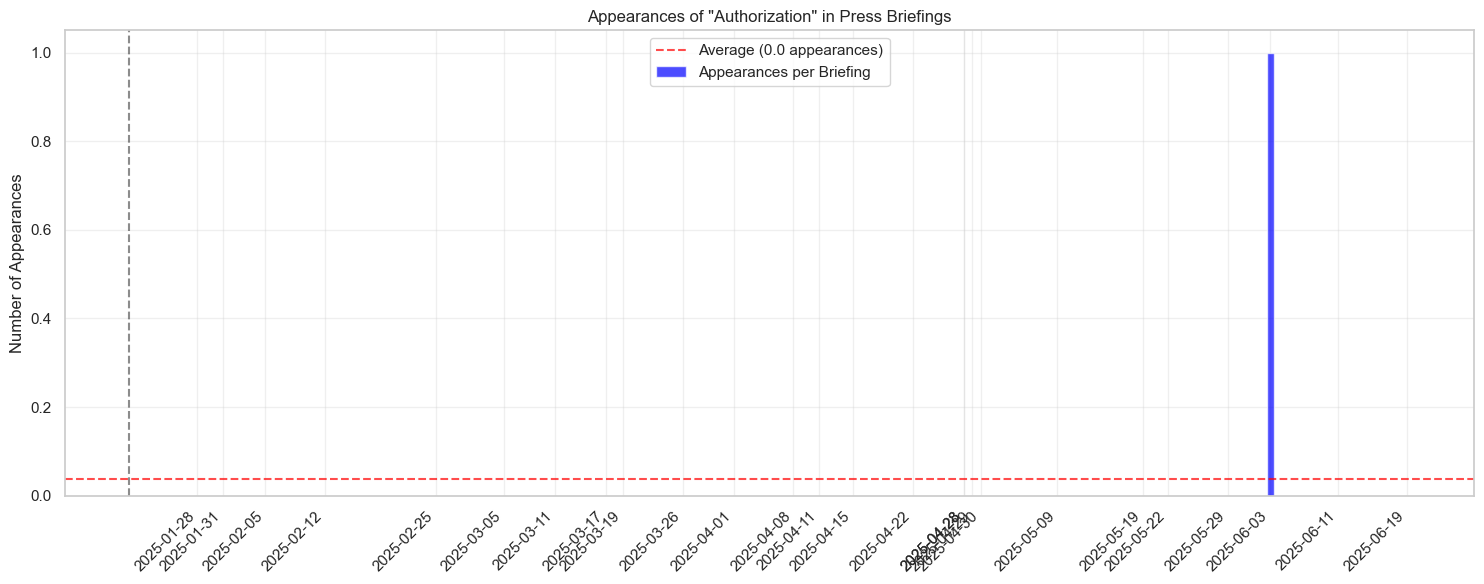

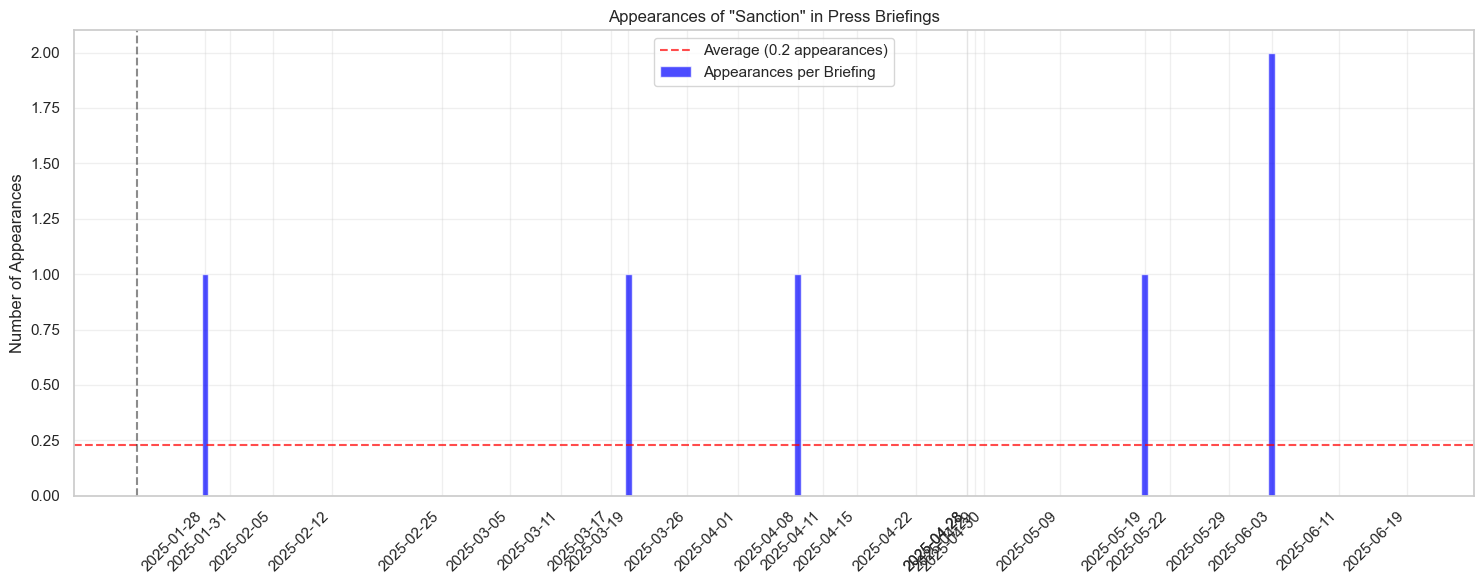

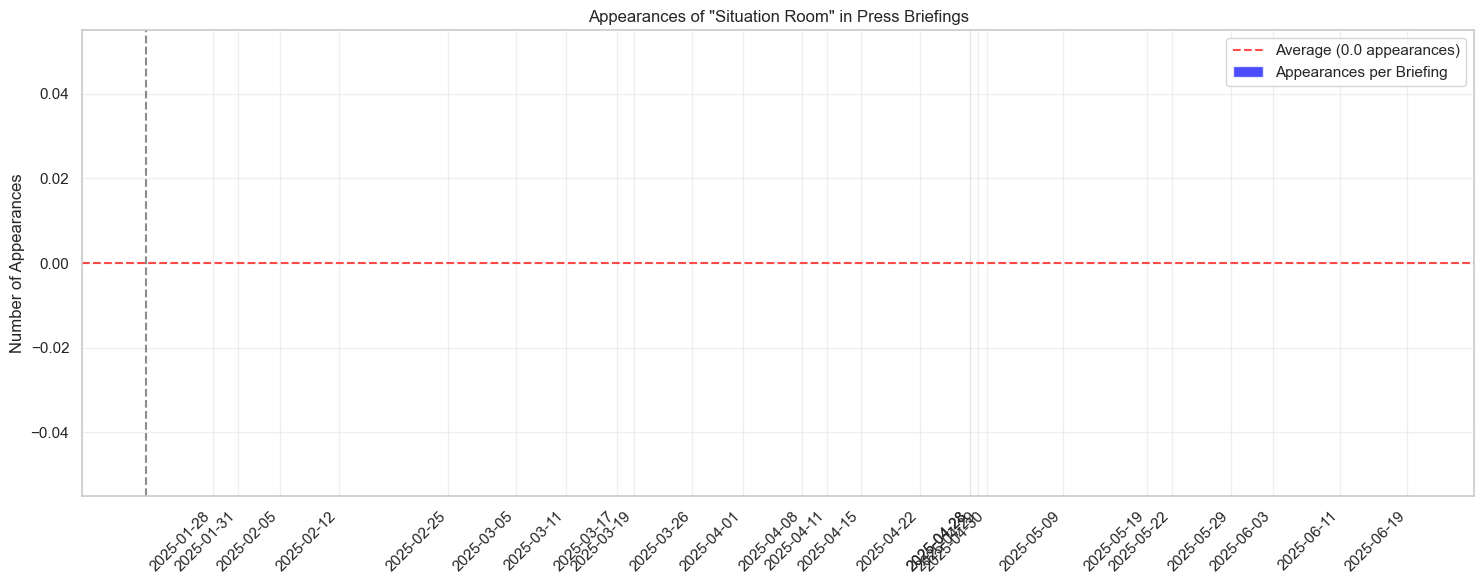

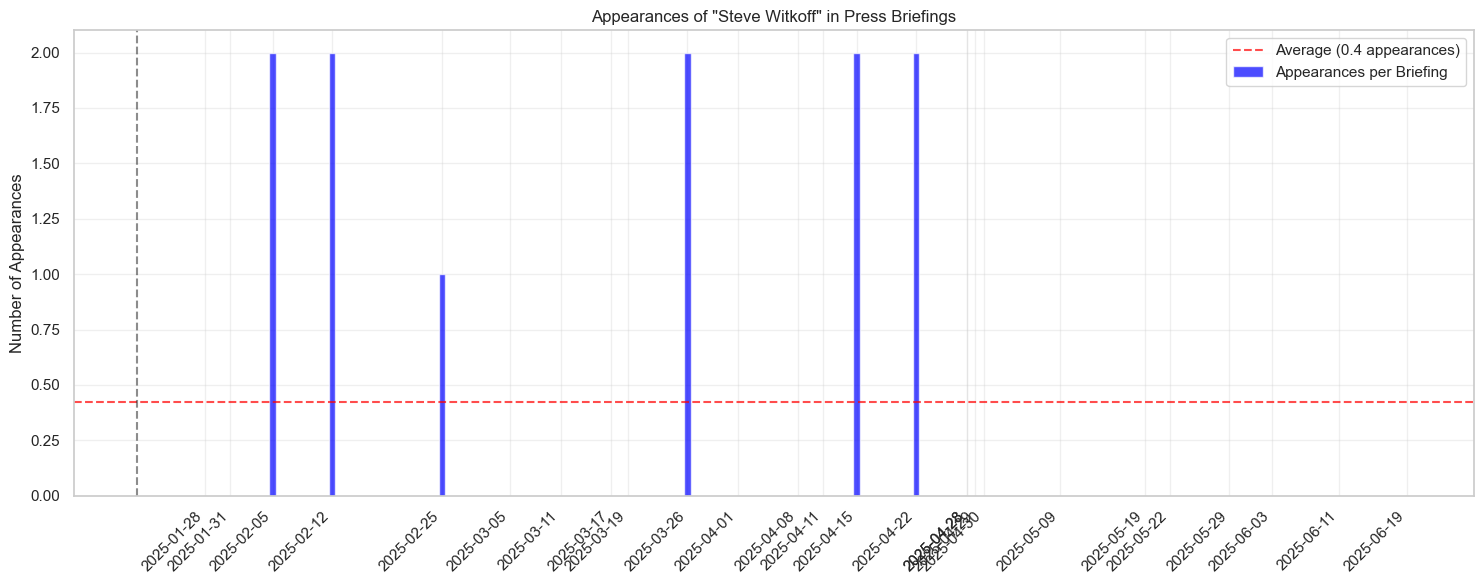

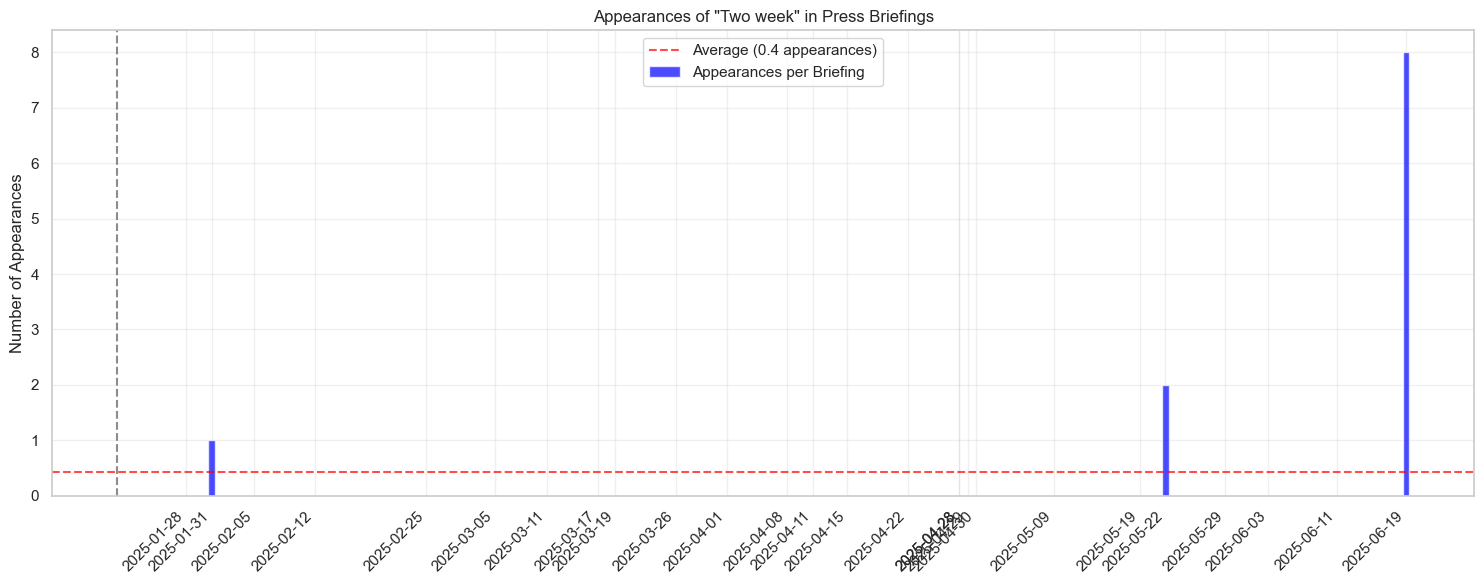

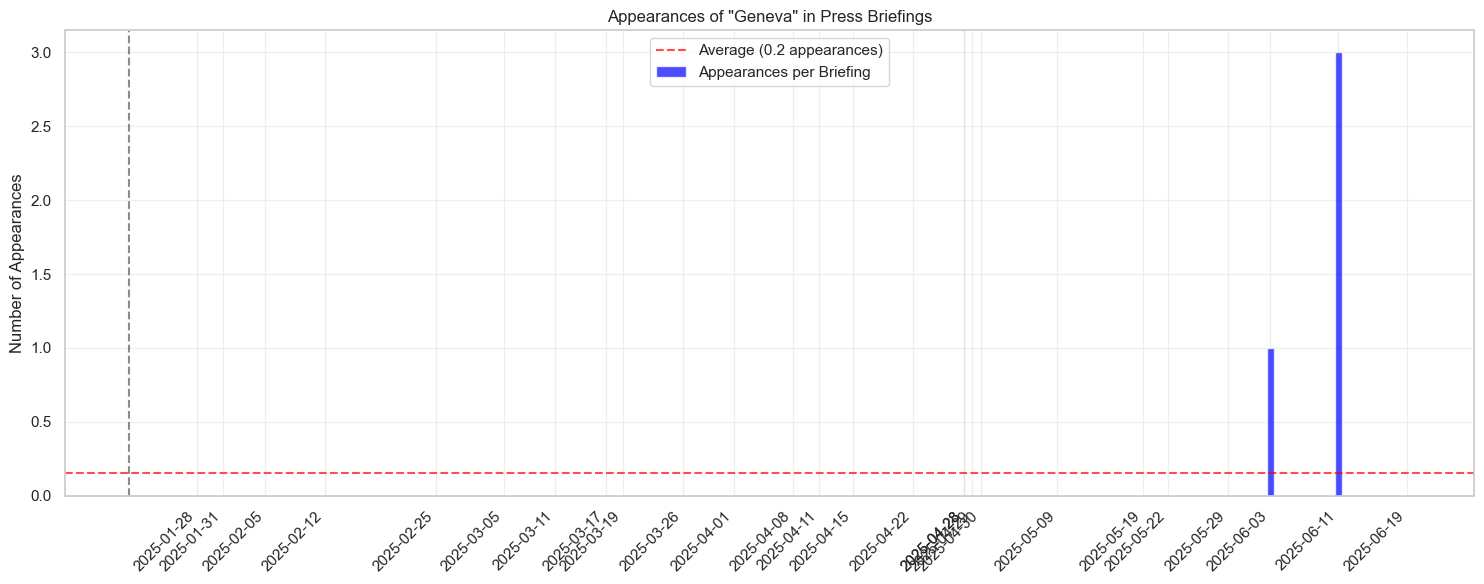

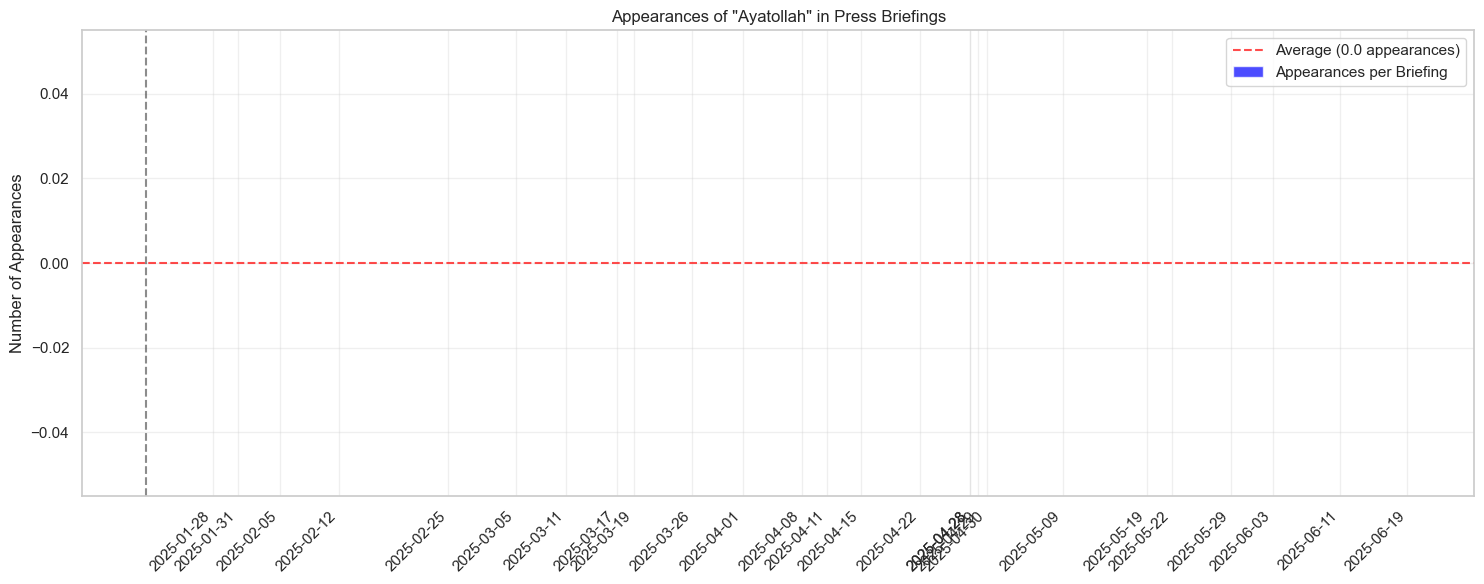

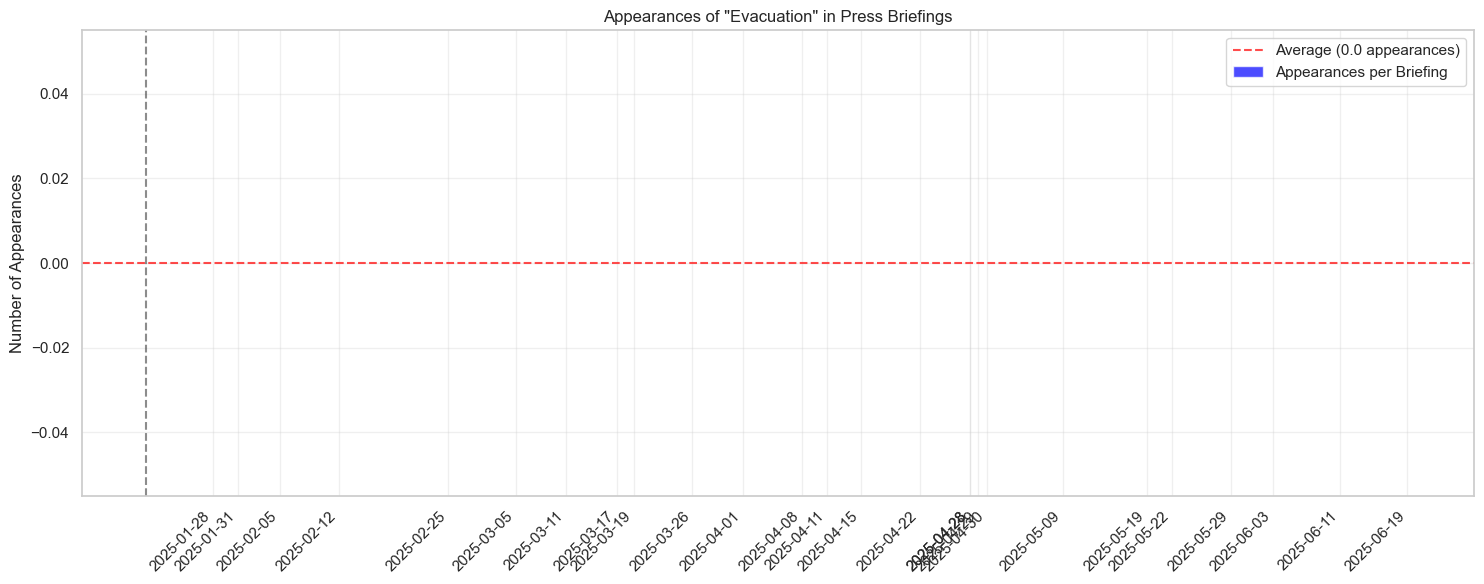

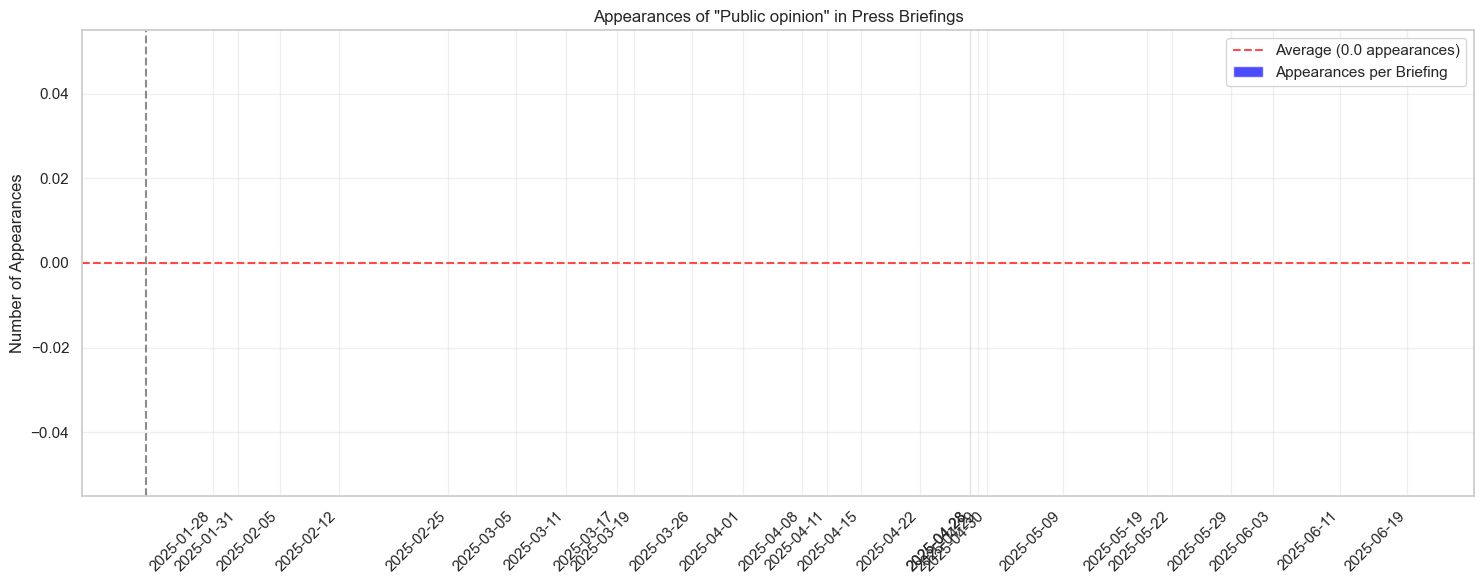

In [8]:
def plot_phrase_frequency_over_time(df, phrase):
    """Plot the frequency of a phrase over time"""
    plt.figure(figsize=(15, 6))
    
    # Get raw counts and dates
    counts = df[phrase]
    dates = df['date']
    
    # Calculate average
    avg = counts.mean()
    
    # Create bar plot
    bars = plt.bar(dates, counts, alpha=0.7, color='blue', label='Appearances per Briefing')
    
    # Add horizontal line for average
    plt.axhline(y=avg, color='red', linestyle='--', alpha=0.7, 
                label=f'Average ({avg:.1f} appearances)')
    
    # Format x-axis with rotated date labels
    plt.xticks(dates, [d.strftime('%Y-%m-%d') for d in dates], rotation=45, ha='right')
    
    plt.title(f'Appearances of "{phrase}" in Press Briefings')
    plt.xlabel('')  # Remove x-axis label since dates are shown
    plt.ylabel('Number of Appearances')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add vertical line for inauguration
    plt.axvline(x=INAUGURATION_DATE, color='k', linestyle='--', alpha=0.5, label='Inauguration')
    
    plt.tight_layout()
    plt.show()

# Plot time series for all phrases
for phrase in SEARCH_PHRASES.keys():
    plot_phrase_frequency_over_time(df, phrase)

## Recent Usage in Context

In [9]:
def get_recent_contexts(df, phrase, n=5):
    """Get the n most recent contexts for a phrase"""
    all_matches = []
    
    for _, row in df.sort_values('date', ascending=False).iterrows():
        matches = find_phrase_context(row['text'], SEARCH_PHRASES[phrase])
        for match in matches:
            all_matches.append({
                'date': row['date'],
                'context': match
            })
        if len(all_matches) >= n:
            break
    
    return pd.DataFrame(all_matches[:n])

# Get recent contexts for each phrase
for phrase in SEARCH_PHRASES.keys():
    contexts = get_recent_contexts(df, phrase)
    if not contexts.empty:
        print(f"\n=== Recent usage of '{phrase}' ===\n")
        for _, row in contexts.iterrows():
            print(f"Date: {row['date'].strftime('%Y-%m-%d')}")
            print(f"Context: {row['context']}\n")


=== Recent usage of 'Iran' ===

Date: 2025-06-19
Context: ...his promises and taking action every day to improve their lives, and passing this bill will help fulfill a number of President Trump's core campaign promises.

Now, regarding the ongoing situation in Iran, I know there has been a lot of speculation amongst all of you in the media regarding the president's decision-making and whether or not the United States will be directly involved. In light of that ...

Date: 2025-06-19
Context: ...ly involved. In light of that news, I have a message directly from the president, and I quote. "Based on the fact that there's a substantial chance of negotiations that may or may not take place with Iran in the near future, I will make my decision whether or not to go within the next two weeks." That's a quote directly from the president for all of you today.

So we'll kick it off for questions here ...

Date: 2025-06-19
Context: ... Trump has incredible instincts, and President Trump kept Amer

## Phrase Co-occurrence Analysis

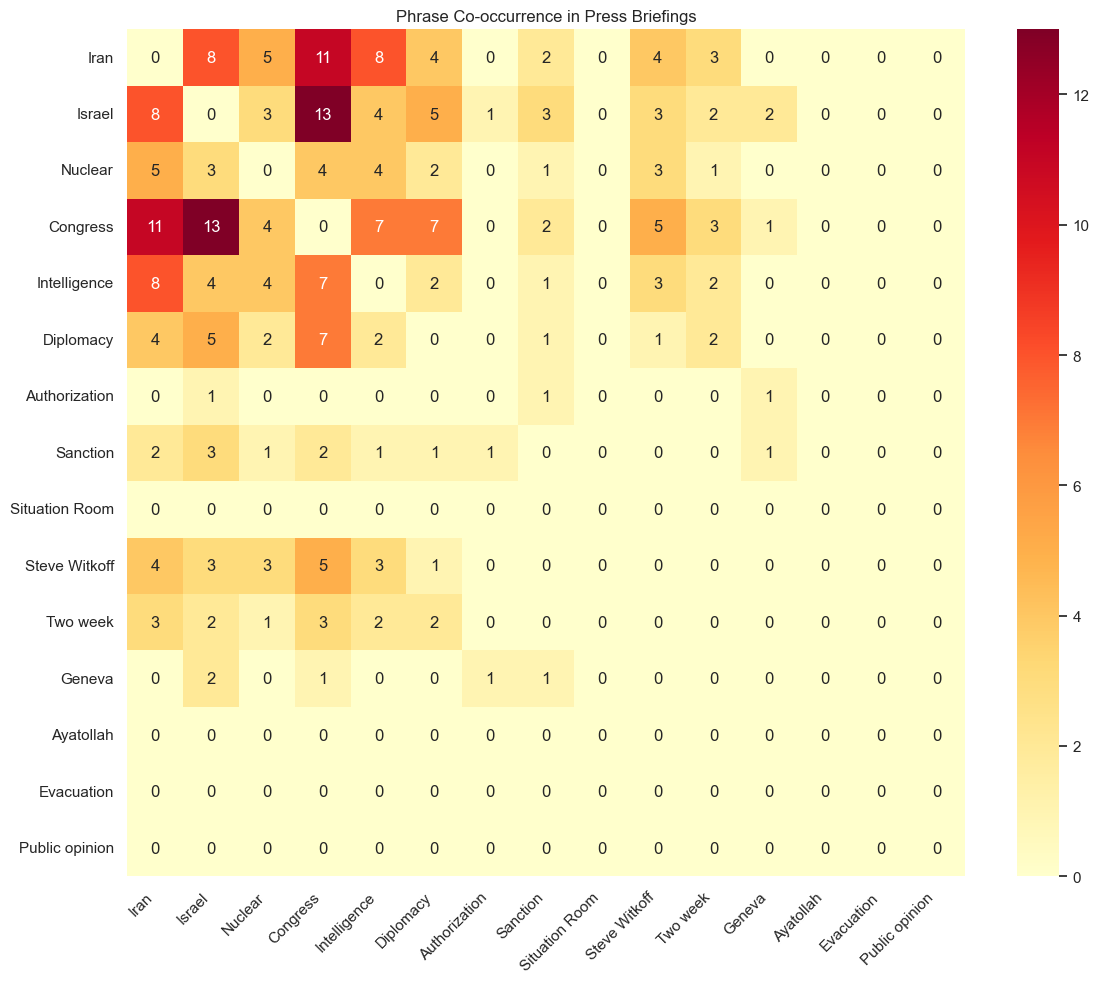

In [10]:
# Create co-occurrence matrix
phrase_cols = list(SEARCH_PHRASES.keys())
cooccurrence = np.zeros((len(phrase_cols), len(phrase_cols)))

for i, phrase1 in enumerate(phrase_cols):
    for j, phrase2 in enumerate(phrase_cols):
        if i != j:
            # Count briefings where both phrases appear
            cooccurrence[i,j] = ((df[phrase1] > 0) & (df[phrase2] > 0)).sum()

# Create and display heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence, 
            xticklabels=phrase_cols,
            yticklabels=phrase_cols,
            annot=True,
            fmt='.0f',
            cmap='YlOrRd')
plt.title('Phrase Co-occurrence in Press Briefings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Phrase Usage Statistics

In [11]:
# Calculate statistics for each phrase
stats_data = []

for phrase in SEARCH_PHRASES.keys():
    stats = {
        'Phrase': phrase,
        'Total Mentions': df[phrase].sum(),
        'Briefings with Mentions': (df[phrase] > 0).sum(),
        'Percentage of Briefings': (df[phrase] > 0).mean() * 100,
        'Average per Briefing': df[phrase].mean(),
        'Max in Single Briefing': df[phrase].max()
    }
    stats_data.append(stats)

stats_df = pd.DataFrame(stats_data)
stats_df = stats_df.sort_values('Total Mentions', ascending=False)

# Format the table
stats_df['Percentage of Briefings'] = stats_df['Percentage of Briefings'].round(1).astype(str) + '%'
stats_df['Average per Briefing'] = stats_df['Average per Briefing'].round(2)

display(stats_df)

,Phrase,Total Mentions,Briefings with Mentions,Percentage of Briefings,Average per Briefing,Max in Single Briefing
3,Congress,69,21,80.8%,2.65,9
0,Iran,55,13,50.0%,2.12,19
1,Israel,24,15,57.7%,0.92,5
2,Nuclear,20,6,23.1%,0.77,11
4,Intelligence,15,10,38.5%,0.58,3
9,Steve Witkoff,11,6,23.1%,0.42,2
10,Two week,11,3,11.5%,0.42,8
5,Diplomacy,9,7,26.9%,0.35,3
7,Sanction,6,5,19.2%,0.23,2
11,Geneva,4,2,7.7%,0.15,3
